# Análise exploratória de dados

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 1. Leitura do conjunto de dados

In [29]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição dos dados

Um conjunto de dados sobre carros e seus preços e características associados; fabricados entre 1970-82 nos EUA, Europa e Japão.

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University. O conjunto de dados foi usado na American Statistical Association Exposition de 1983.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [31]:
df.shape

(398, 9)

In [32]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## 2.1. Dicionário de dados

In [33]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Medida utilizada para determinar a eficiência ...,quantitativa,contínua
1,cylinders,Quantidade de cilindros,quantitativa,discreta
2,displacement,Se refere ao volume de gás sugado ou descarreg...,quantitativa,contínua
3,horsepower,Representa a quantidade de trabalho que um mot...,quantitativa,contínua
4,weight,Peso do veículo,quantitativa,contínua
5,acceleration,Mecanismo que permite ao motorista aumentar ou...,quantitativa,contínua
6,model_year,Ano de fabricação,quantitativa,discreta
7,origin,País de origem,qualitativa,nominal
8,name,Nome do modelo,qualitativa,nominal


#### São 9 variáveis, 5 quantitativas contínuas, 2 quantitativas discretas e 2 qualitativas nominais.

## 3. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?
* A eficiência de combsutível (mpg) variou ao longo dos anos de fabricação (model_year)?
* Existe uma relação entre o número de cilindros e a potência do motor (horsepower)?
* O peso do veículo influencia na aceleração (acceleration)? 

#### Existem dados faltantes, se sim quantos e em quais variáveis?

In [34]:
df.isnull().sum().sort_values(ascending=False)

horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [35]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [36]:
df["cylinders"] = df["cylinders"].astype("float64")
df["weight"] = df["weight"].astype("float64")
df["model_year"] = df["model_year"].astype("float64")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.1+ KB


#### Qual a distribuição dos dados (variável por variável)?

In [38]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


* Existem três países de origem (``origin``)
* O País (``origin``) mais frequente é USA
* A média da eficiência de combsutível (``mpg``) é de 23, com um mínimo de 9 e máximo de 46
* A média de cilindros (``cylinders``) por carro é de 5, com um mínimo de 3 e máximo de 8
* A média de volume de gás (``displacement``) por carro é de 194, com um mínimo de 68 e máximo de 455
* A média de cavalos de potência (``horsepower``) por carro é de 104, com um mínimo de 46 e máximo de 230
* O peso (``weight``) varia entre 1.613 e 5.140, com média de 2.977
* A média de aceleração (``acceleration``) por carro é de 15, com um mínimo de 8 e máximo de 24
* O carro mais antigo (``model_year``) é do ano 1970 e o mais recente do ano 1982

In [40]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [41]:
print(df['origin'].unique())
print(df['name'].unique())

['usa' 'japan' 'europe']
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota co

In [15]:
df.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [42]:
df.name.value_counts() 

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

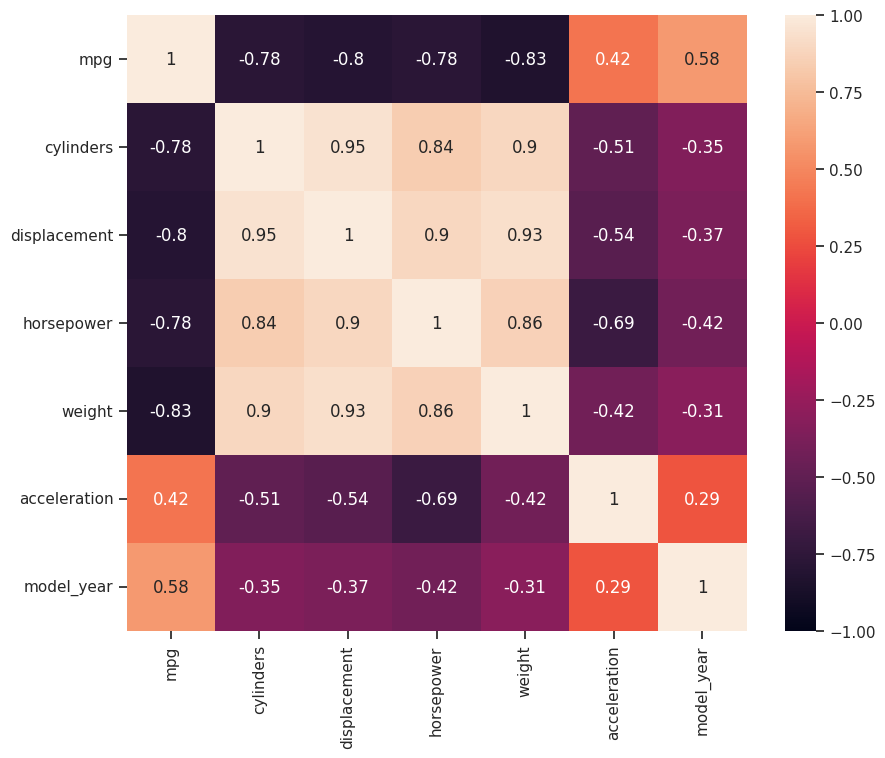

In [47]:
quantitativas = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
correlation = df[quantitativas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

#### A eficiência de combsutível (``mpg``) variou ao longo dos anos de fabricação (``model_year``)?

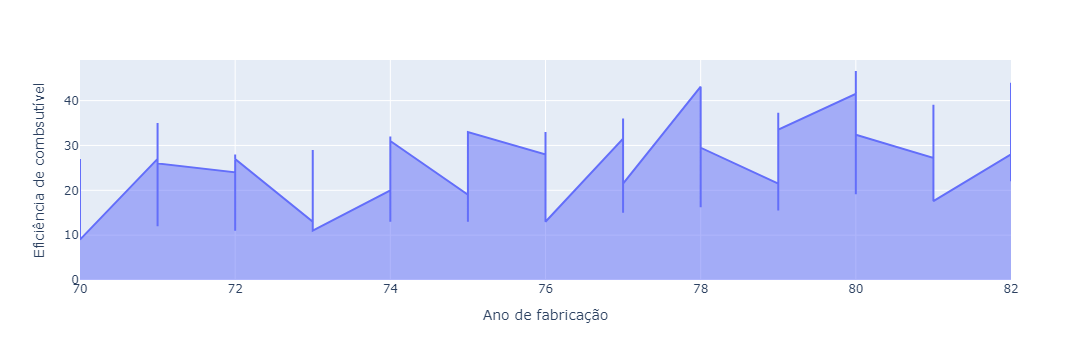

In [48]:
fig = px.area(df, x='model_year', y='mpg')
fig.update_layout(
    xaxis_title="Ano de fabricação",
    yaxis_title="Eficiência de combsutível")
fig.show()

#### Existe uma relação entre o número de cilindros (``cylinders``) e a potência do motor (``horsepower``)?

<Axes: xlabel='cylinders', ylabel='horsepower'>

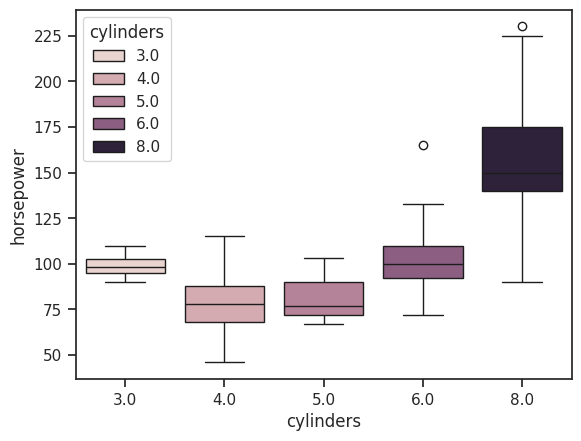

In [49]:
sns.boxplot(data=df, x='cylinders', y='horsepower', hue='cylinders')

#### O peso (``weight``) do veículo influencia na aceleração (``acceleration``)?

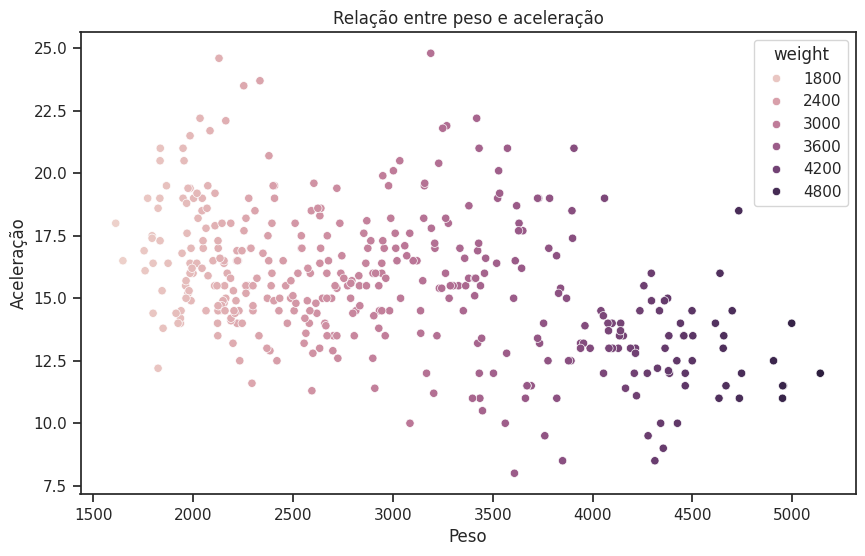

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='acceleration', hue='weight')
plt.title("Relação entre peso e aceleração")
plt.xlabel("Peso")
plt.ylabel("Aceleração")
plt.show()

## 3. Insights